In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:  
 
1. Problem Statement:   
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.  
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.  


Dataset Description:  
Number of columns: 23  


Date  - The date of observation  
Location  -The common name of the location of the weather station  
MinTemp  -The minimum temperature in degrees celsius  
MaxTemp -The maximum temperature in degrees celsius  
Rainfall  -The amount of rainfall recorded for the day in mm  
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am  
Sunshine  -The number of hours of bright sunshine in the day.  
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight  
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight  
WindDir9am -Direction of the wind at 9am  
WindDir3pm -Direction of the wind at 3pm  
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am  
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm  
Humidity9am -Humidity (percent) at 9am  
Humidity3pm -Humidity (percent) at 3pm  
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am  
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm  
Cloud9am - Fraction of sky obscured by cloud at 9am.   
Cloud3pm -Fraction of sky obscured by cloud   
Temp9am-Temperature (degrees C) at 9am  
Temp3pm -Temperature (degrees C) at 3pm  
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0  
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".  


# Importing Dataset

In [396]:
df=pd.read_csv(r'E:\fliprobo technologies\projects\Evaluation projects\Evaluation projects 3rd\dsrscientist_dataset3_main_weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Exploratory Data analysis (EDA)

In [397]:
df.shape

(8425, 23)

the dataset contains 8425 rows and 23 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 22 are independent variables(features,input variables)

In [398]:
# checking the column of the dataset and we are storeing it in the list 
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [399]:
# checking data types of the columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# checking the null values

In [400]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

there are null values present

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

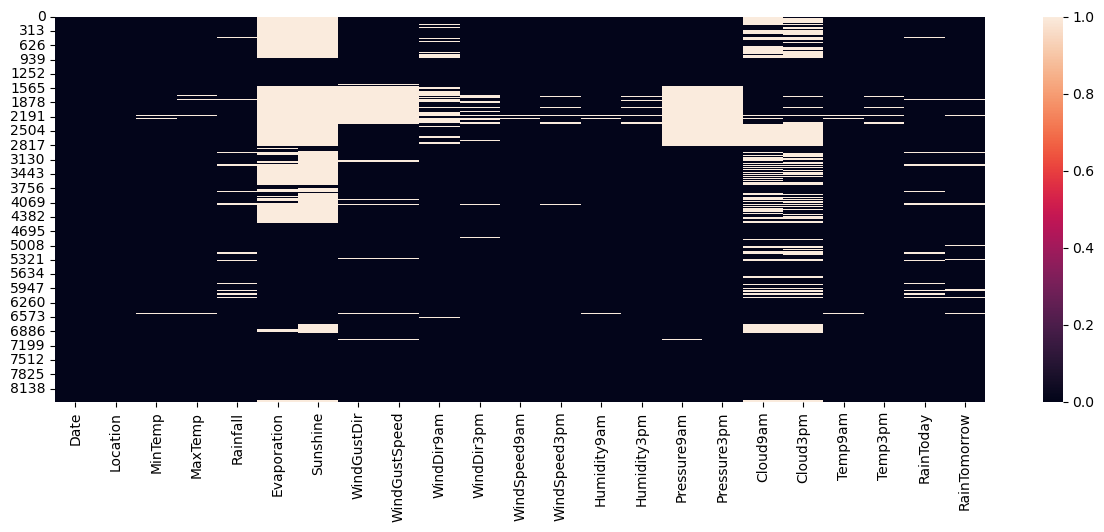

In [402]:
# lets visualize nulls using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

on visualizing we found null values are present

# checking duplicates

In [403]:
df.duplicated().sum()

1663

there are 1663 duplicate values present

# Removing Duplicates

In [404]:
df1 = df.drop_duplicates()

In [405]:
print('Total rows before',df.shape)
print('Total rows after',df1.shape)
print("total duplicate rows removed-",df.shape[0]-df1.shape[0])

Total rows before (8425, 23)
Total rows after (6762, 23)
total duplicate rows removed- 1663


No duplicate values are left

# checking the null values again

In [406]:
df1.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

null values still present

In [407]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [408]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# checking value counts of each column

In [409]:
for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Le

# take the mean to replace nan in continous data

In [410]:

MinTemp_mean = df1['MinTemp'].mean()
MaxTemp_mean= df1['MaxTemp'].mean()
Rainfall_mean=df1['Rainfall'].mean()
Evaporation_mean=df1['Evaporation'].mean()
Sunshine_mean=df1['Sunshine'].mean()
WindGustSpeed_mean=df1["WindGustSpeed"].mean()
WindSpeed9am_mean=df1["WindSpeed9am"].mean()
WindSpeed3pm_mean=df1["WindSpeed3pm"].mean()
Humidity9am_mean=df1["Humidity9am"].mean()
Humidity3pm_mean=df1["Humidity3pm"].mean()
Pressure9am_mean=df1["Pressure9am"].mean()
Pressure3pm_mean=df1["Pressure3pm"].mean()
Cloud9am_mean=df1["Cloud9am"].mean()
Cloud3pm_mean=df1["Cloud3pm"].mean()
Temp9am_mean=df1["Temp9am"].mean()
Temp3pm_mean=df1["Temp3pm"].mean()

In [411]:
# Replace NaN values with the mean in continous column
df1['MinTemp'].fillna(MinTemp_mean, inplace=True)
df1['MaxTemp'].fillna(MaxTemp_mean, inplace=True)
df1['Rainfall'].fillna(Rainfall_mean, inplace=True)
df1['Evaporation'].fillna(Evaporation_mean, inplace=True)
df1['Sunshine'].fillna(Sunshine_mean, inplace=True)
df1["WindGustSpeed"].fillna(WindGustSpeed_mean,inplace=True)
df1["WindSpeed9am"].fillna(WindSpeed9am_mean,inplace=True)
df1["WindSpeed3pm"].fillna(WindSpeed3pm_mean,inplace=True)
df1["Humidity9am"].fillna(Humidity9am_mean,inplace=True)
df1["Humidity3pm"].fillna(Humidity3pm_mean,inplace=True)
df1["Pressure9am"].fillna(Pressure9am_mean,inplace=True)
df1["Pressure3pm"].fillna(Pressure3pm_mean,inplace=True)
df1["Cloud9am"].fillna(Cloud9am_mean,inplace=True)
df1["Cloud3pm"].fillna(Cloud3pm_mean,inplace=True)
df1["Temp9am"].fillna(Temp9am_mean,inplace=True)
df1["Temp3pm"].fillna(Temp3pm_mean,inplace=True)

In [412]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.302395,7.890896,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.302395,7.890896,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.302395,7.890896,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.302395,7.890896,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.302395,7.890896,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.302395,7.890896,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.302395,7.890896,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.302395,7.890896,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.302395,7.890896,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


# take the mode to replace nan in categorical data

In [413]:
WindGustDir_mode = df1['WindGustDir'].mode()[0]
WindDir9am_mode = df1['WindDir9am'].mode()[0]
WindDir3pm_mode = df1['WindDir3pm'].mode()[0]
RainToday_mode = df1['RainToday'].mode()[0]
RainTomorrow_mode = df1['RainTomorrow'].mode()[0]

In [414]:
# Replace NaN values with the mode in categorical column
df1['WindGustDir'].fillna(WindGustDir_mode, inplace=True)
df1['WindDir9am'].fillna(WindDir9am_mode, inplace=True)
df1['WindDir3pm'].fillna(WindDir3pm_mode, inplace=True)
df1['RainToday'].fillna(RainToday_mode, inplace=True)
df1['RainTomorrow'].fillna(RainTomorrow_mode, inplace=True)

In [415]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Description of Dataset

In [416]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


The counts of all the columns are same which means there are no missing values left in the dataset.

# Checking for Outliers

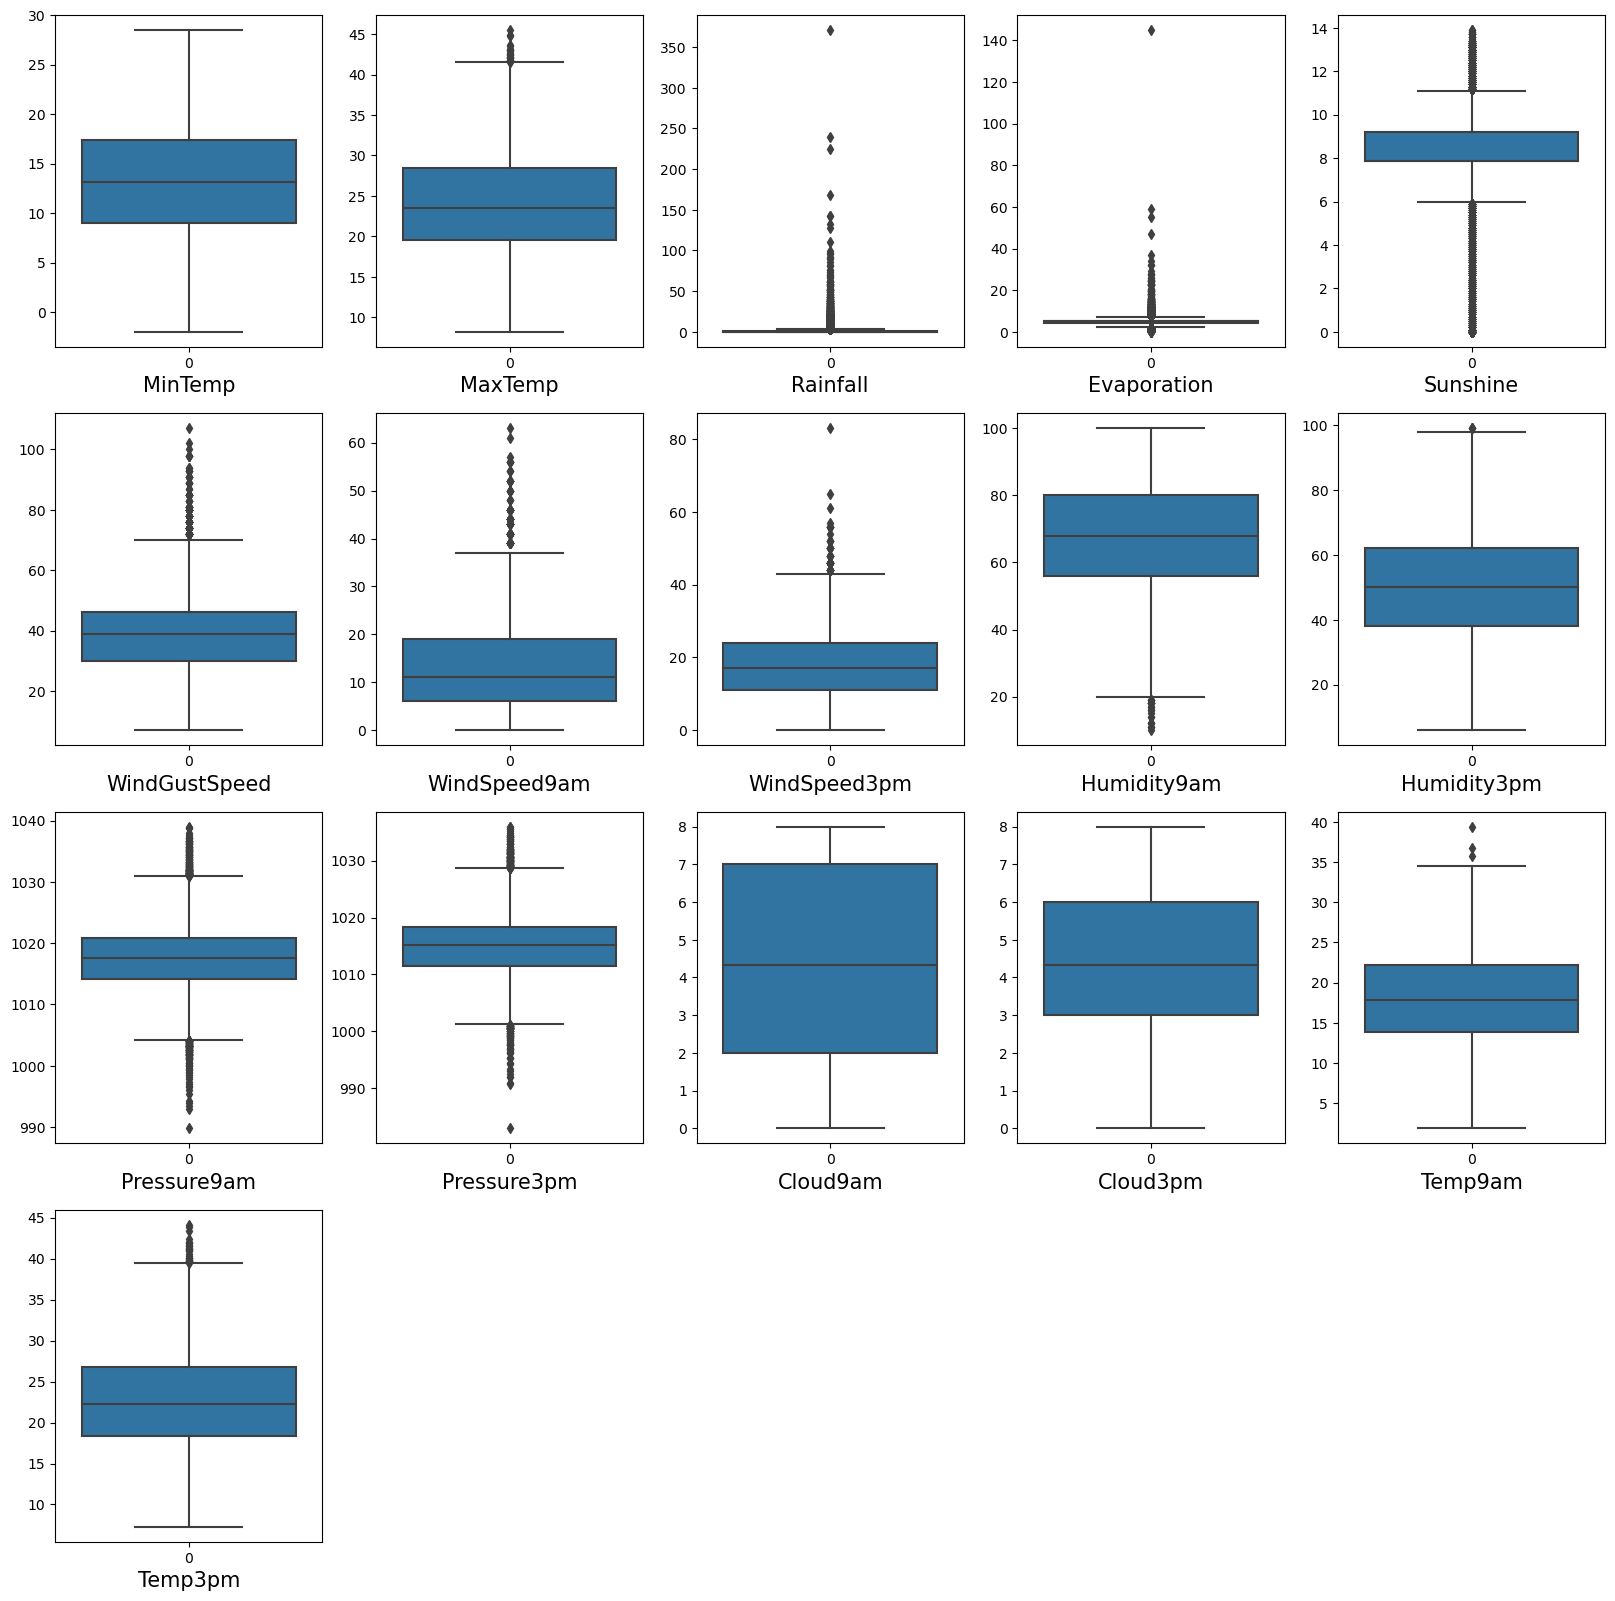

In [417]:
plt.figure(figsize=(20,25))
plot=1
for i in df1:
    if df1.dtypes[i] !='object':
        if plot<=25:
            plt.subplot(5,5,plot)
            sns.boxplot(data=df1[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

outliers present

# Encoding categorical columns

In [418]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,5.302395,7.890896,13.0,44.000000,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,0.0,5.302395,7.890896,14.0,44.000000,6.0,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,0.0,5.302395,7.890896,15.0,46.000000,13.0,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,0.0,5.302395,7.890896,4.0,24.000000,9.0,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.0,5.302395,7.890896,13.0,41.000000,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,5.302395,7.890896,0.0,31.000000,9.0,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,0.0,5.302395,7.890896,6.0,22.000000,9.0,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,0.0,5.302395,7.890896,3.0,37.000000,9.0,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,0.0,5.302395,7.890896,9.0,28.000000,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


# removing outliers

In [419]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape

(6762, 23)

In [420]:
print(np.where(z>3))

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
        381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
        568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
        770,  795,  796,  797,  802,  928,  928,  935,  949,  979,  980,
        980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203,
       1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
       1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
       1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108, 2116, 2186, 2201,
       2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
       2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859,
       2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2900, 2901,
       2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967,
       2975, 2989, 3003, 3027, 3045, 3051, 3051, 3

In [421]:
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(6762, 23)
(6409, 23)


In [422]:
loss=(df1.shape[0]-df2.shape[0])/df1.shape[0]*100
print(loss)

5.220349009168885


5.22% dass loss

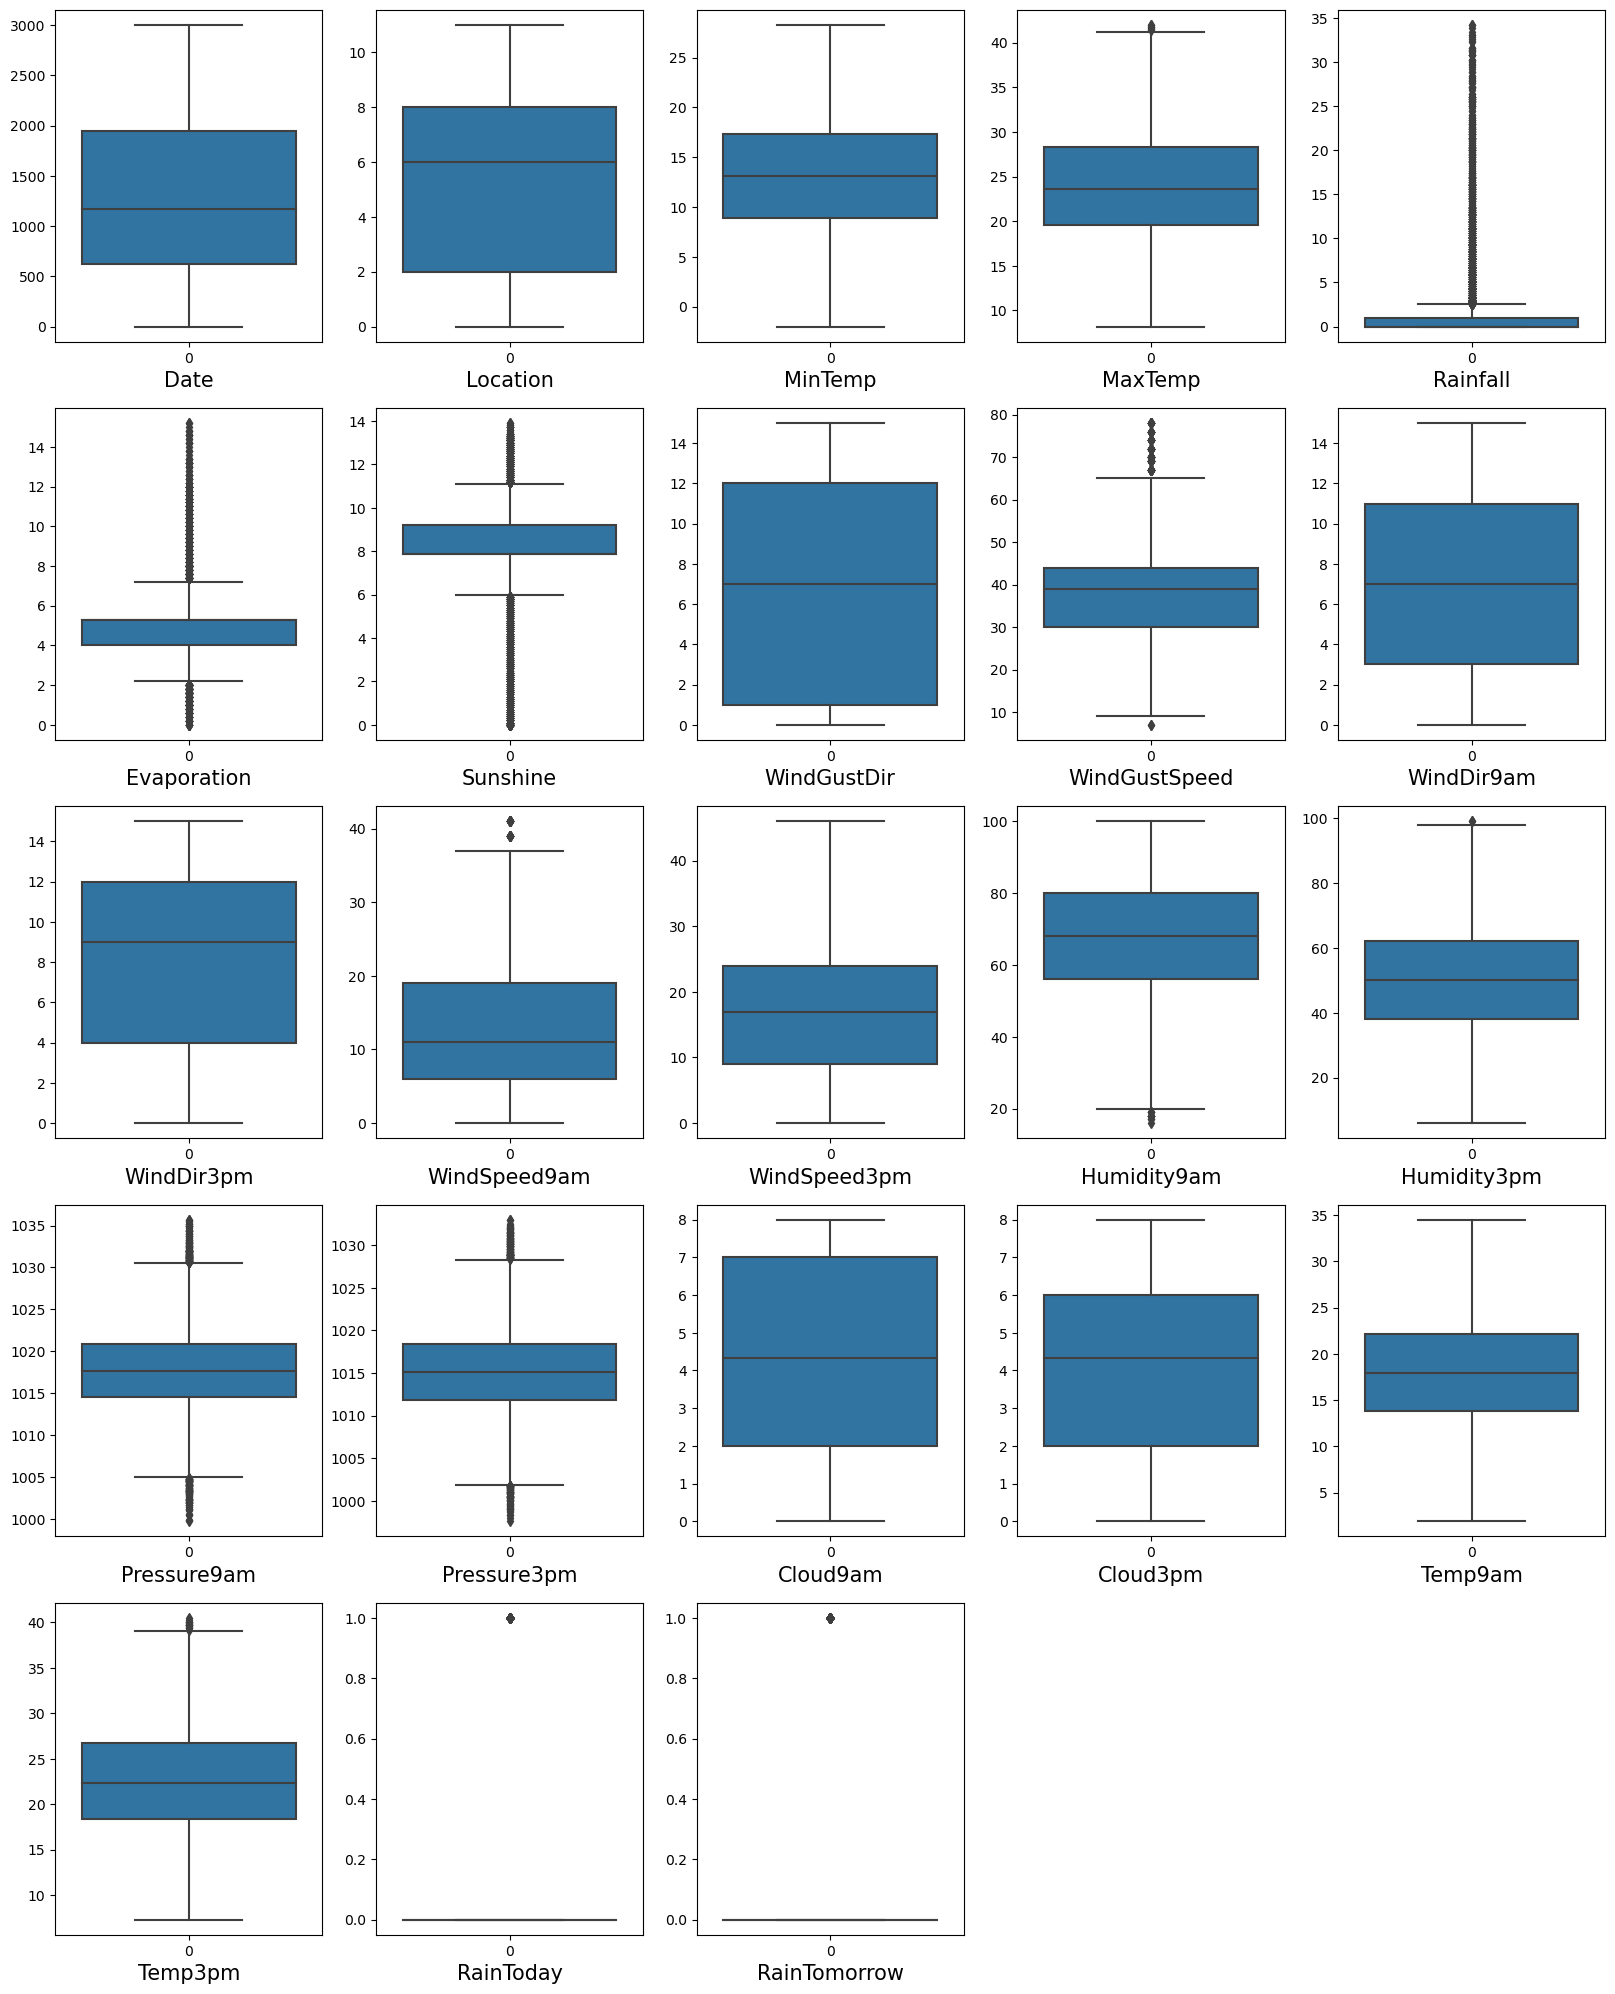

In [423]:
# checking outliers again
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=25:
        ac=plt.subplot(5,5,plotnumber)
        sns.boxplot(data=df2[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

# checking distribution

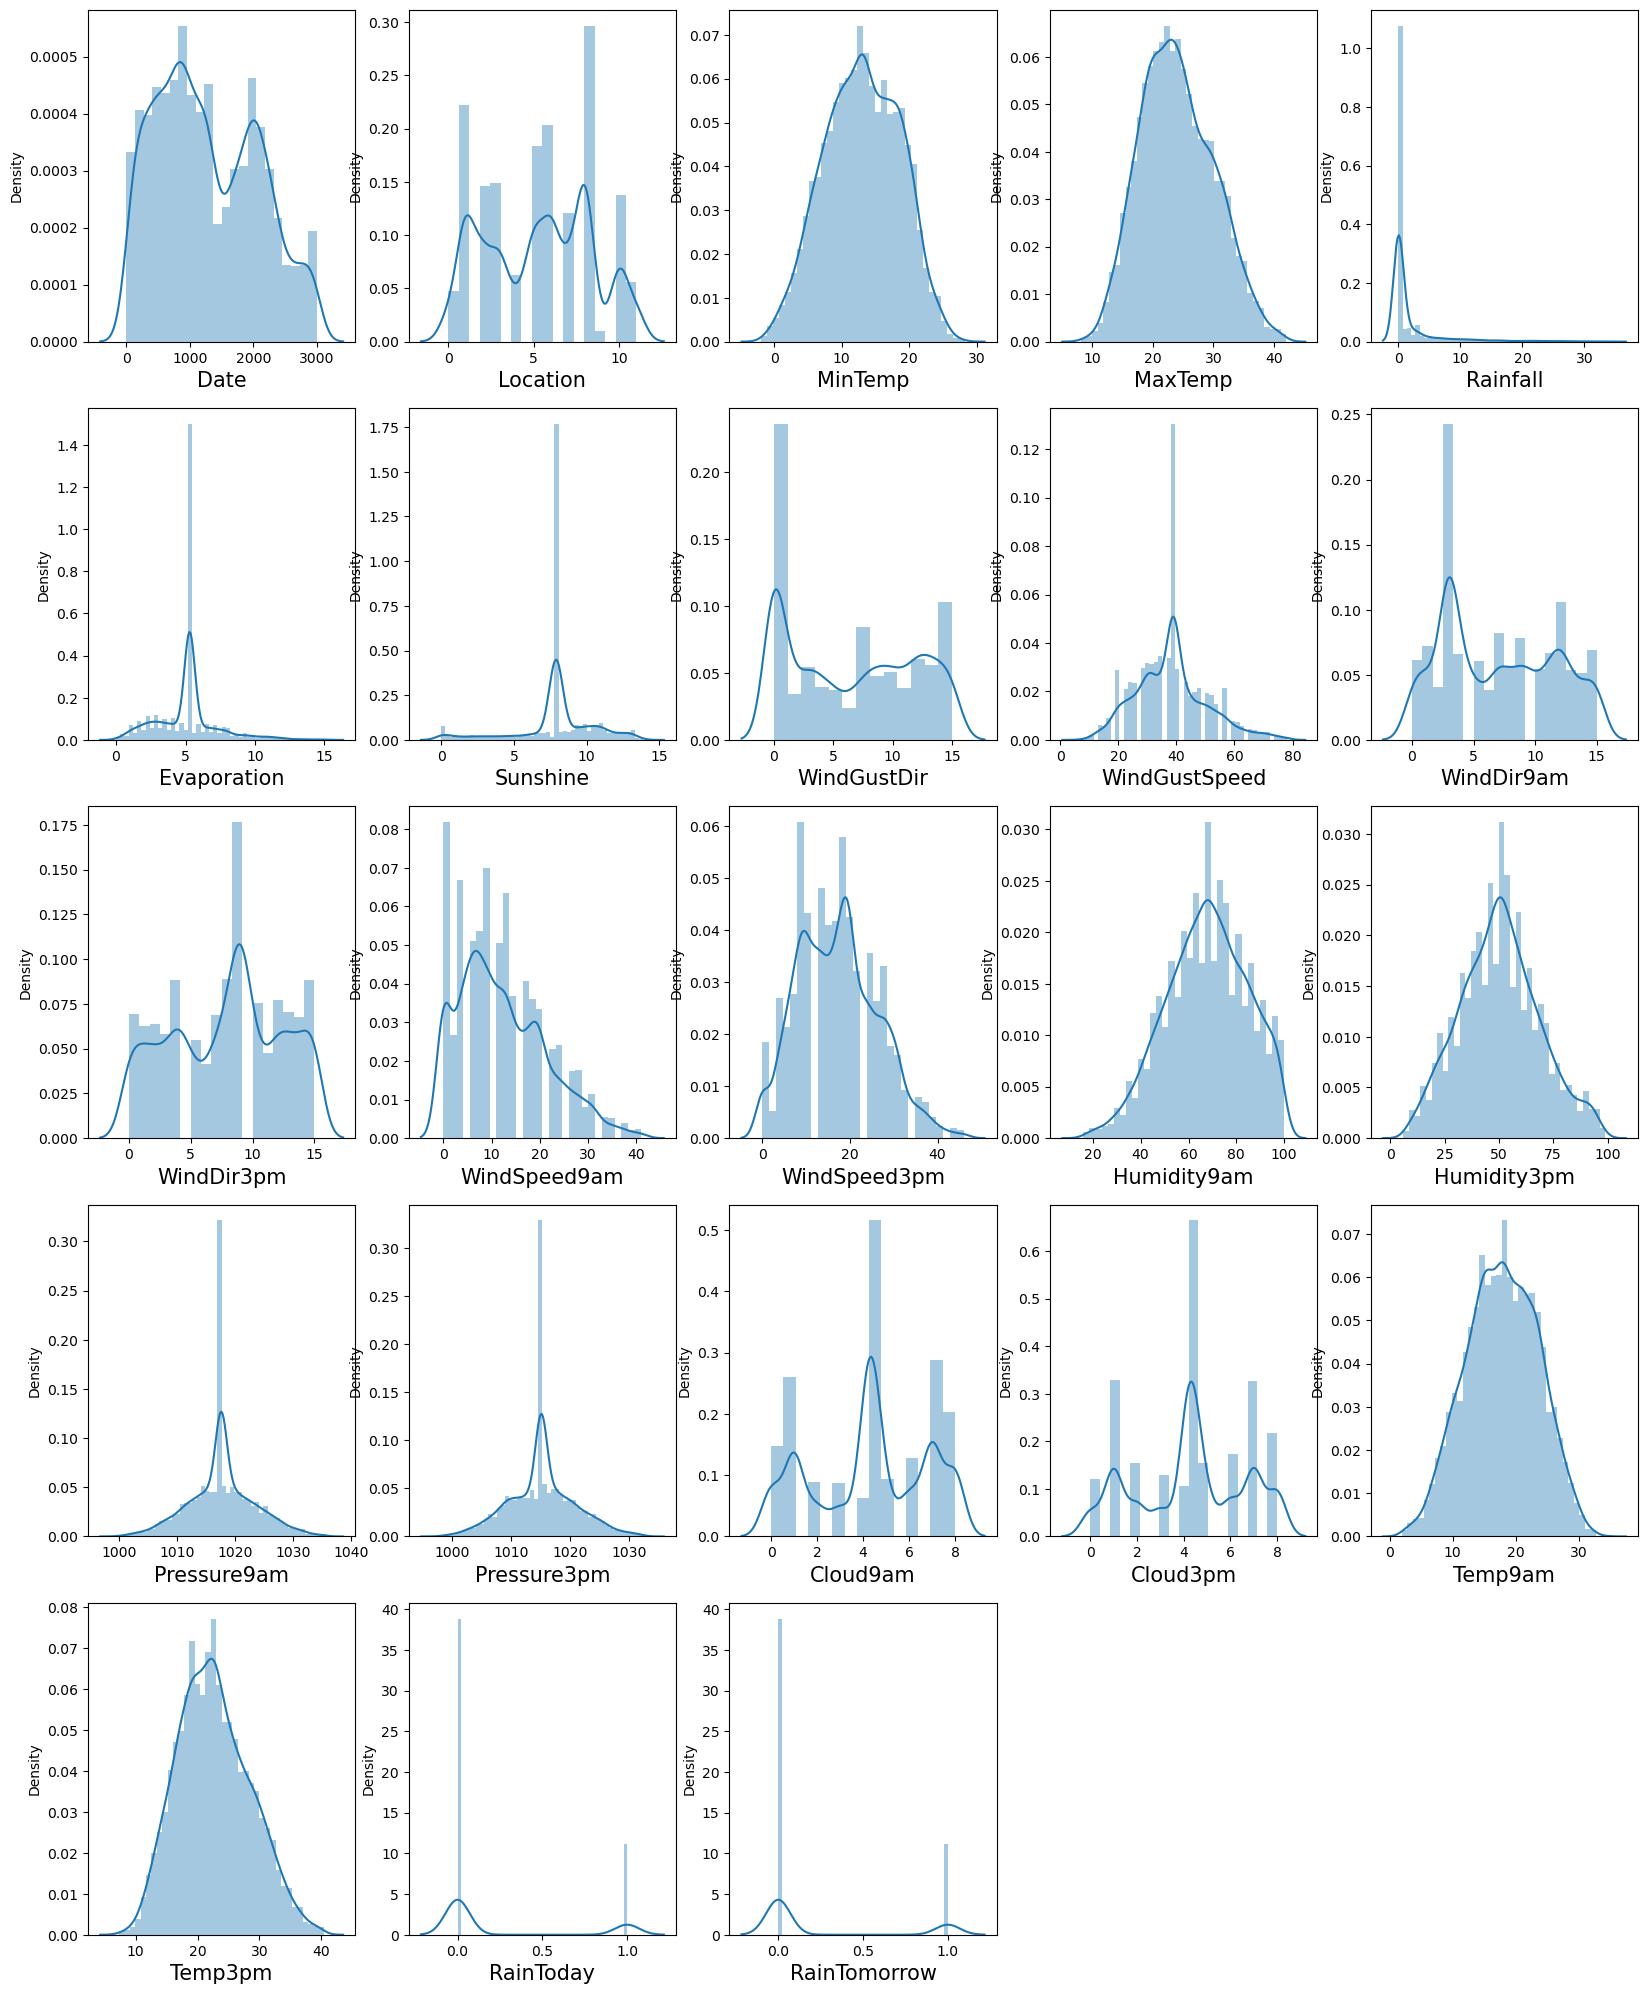

In [424]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df2:
    if plotnumber<=25:
        ac=plt.subplot(5,5,plotnumber)
        sns.distplot(df2[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

# checking skewness

In [425]:
df2.skew()

Date             0.321759
Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
dtype: float64

skewness is under control

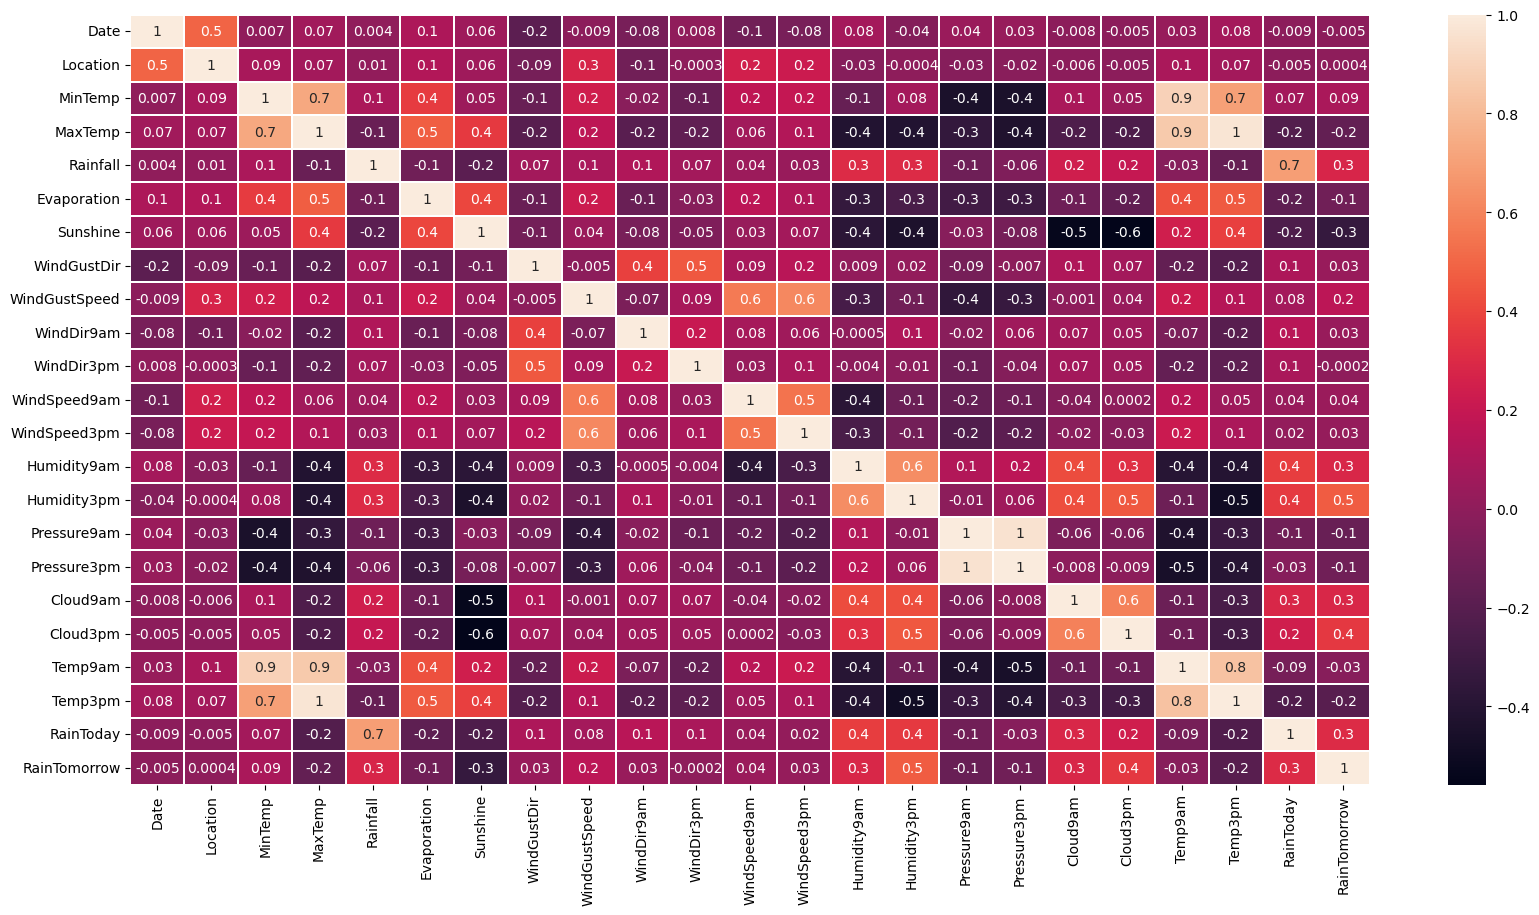

In [426]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,linewidths=0.1,fmt=".1g")
plt.show()

there is high correlation between location and date,temp9am and mintemp,temp3pm ande mintemp,raintoday and rainfall,windspeed and windgust speed,cloud 9 am and cloud 3 pm

# correlation with the target variable

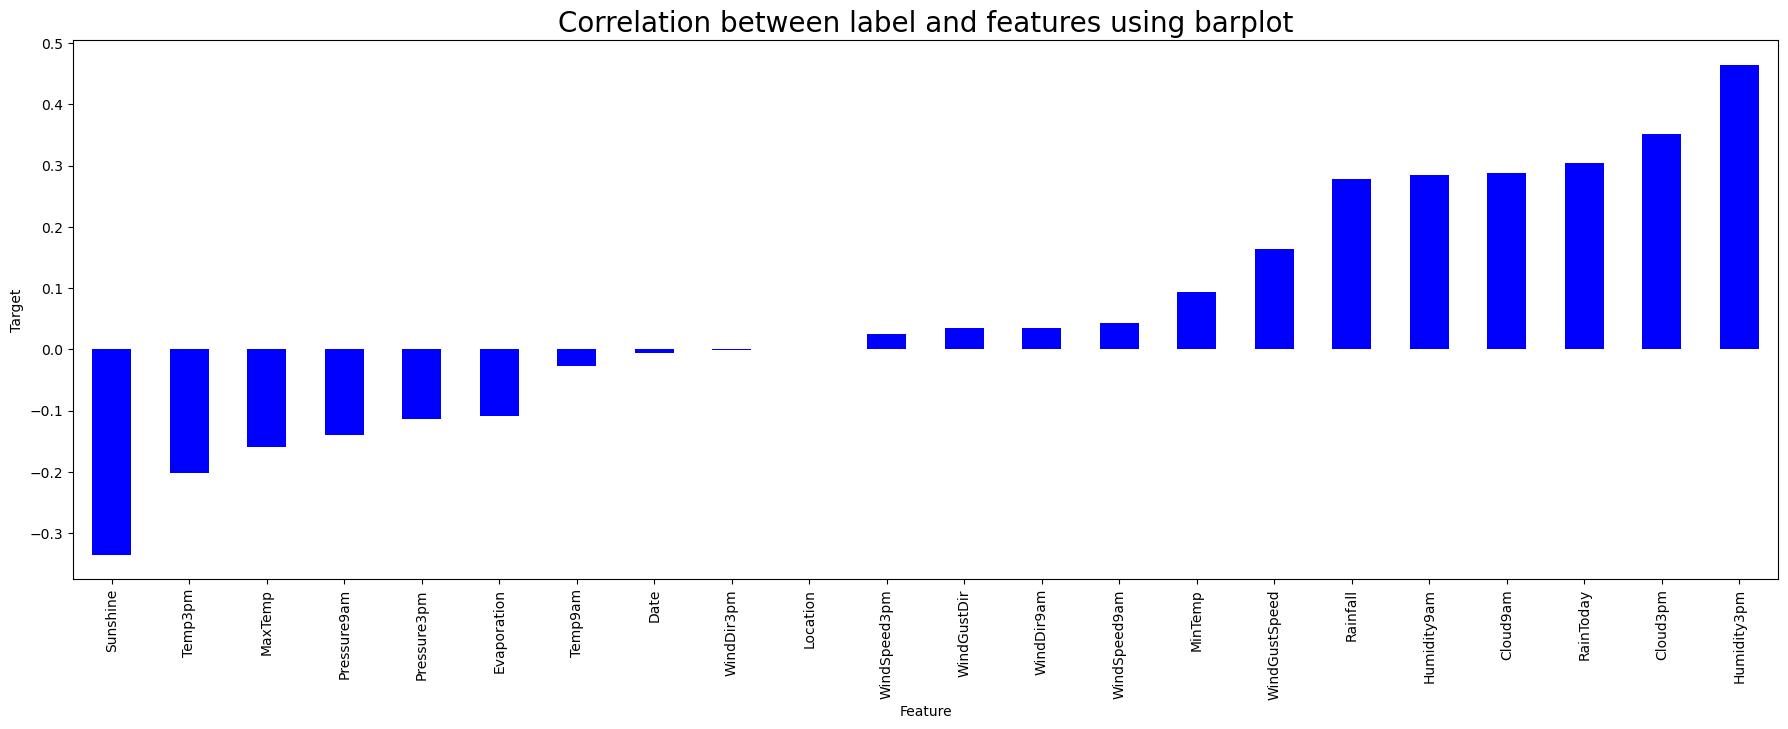

In [427]:
plt.figure(figsize=(22,7))
df2.corr()['RainTomorrow'].sort_values(ascending=True).drop(['RainTomorrow']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

there is no or very less correlation between target and location,,date,temp9am,windspeed3pm,windgustdirection,winddir9am. 

# seperating features and label

In [428]:
x=df2.drop("RainTomorrow",axis=1)
y=df2["RainTomorrow"]

# using Standard Scalarization

In [429]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.617978,-1.391396,0.069172,-0.190821,-0.274030,0.088552,-0.017794,1.222524,0.483303,1.317076,...,0.756780,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675
1,-1.616711,-1.391396,-1.013829,0.174339,-0.399781,0.088552,-0.017794,1.413467,0.483303,-0.222676,...,0.536178,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675
2,-1.615443,-1.391396,-0.021078,0.273928,-0.399781,0.088552,-0.017794,1.604410,0.646634,1.317076,...,0.977382,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675
3,-1.614176,-1.391396,-0.688929,0.655685,-0.399781,0.088552,-0.017794,-0.495963,-1.149999,0.437218,...,-0.897735,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675
4,-1.612909,-1.391396,0.809223,1.369406,-0.190197,0.088552,-0.017794,1.222524,0.238308,-1.322499,...,0.315576,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,2.182240,1.203340,-1.844130,-0.107830,-0.399781,0.088552,-0.017794,-1.259735,-0.578343,0.437218,...,-0.677133,-0.982047,-1.449727,1.194978,0.892021,0.014663,0.017600,-1.358458,-0.047376,-0.535675
6405,2.183507,1.203340,-1.699730,0.207535,-0.399781,0.088552,-0.017794,-0.114077,-1.313329,0.437218,...,-0.897735,-0.686633,-1.614519,1.002652,0.680297,0.014663,0.017600,-1.217780,0.310505,-0.535675
6406,2.184775,1.203340,-1.374830,0.473105,-0.399781,0.088552,-0.017794,-0.686906,-0.088352,0.437218,...,-0.897735,-0.863881,-1.449727,0.565550,0.274493,0.014663,0.017600,-0.936423,0.583177,-0.535675
6407,2.186042,1.203340,-0.941629,0.489704,-0.399781,0.088552,-0.017794,0.458752,-0.823338,0.657182,...,-1.118337,-0.982047,-1.449727,0.285805,0.221562,-0.525762,-0.982885,-0.479217,0.566135,-0.535675


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [430]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.528757,Date
1,1.611221,Location
2,9.012857,MinTemp
3,26.298096,MaxTemp
4,1.979240,Rainfall
5,1.623131,Evaporation
6,2.000784,Sunshine
7,1.577439,WindGustDir
8,2.243689,WindGustSpeed
9,1.336586,WindDir9am


there is no multicollinearity found

# Oversampling

In [431]:
y.value_counts()

0.0    4979
1.0    1430
Name: RainTomorrow, dtype: int64

In [432]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x_scaled,y)

In [433]:
# Checking value count of target column
y.value_counts()

0.0    4979
1.0    4979
Name: RainTomorrow, dtype: int64

# finding the best Random state

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)  
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)

 Best accuracy is 0.9133199464524766 at random_state 75


# creating train test split

In [435]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

# model

In [436]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [437]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7921686746987951
[[1193  289]
 [ 332 1174]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1482
         1.0       0.80      0.78      0.79      1506

    accuracy                           0.79      2988
   macro avg       0.79      0.79      0.79      2988
weighted avg       0.79      0.79      0.79      2988



In [438]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9062918340026773
[[1333  149]
 [ 131 1375]]
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1482
         1.0       0.90      0.91      0.91      1506

    accuracy                           0.91      2988
   macro avg       0.91      0.91      0.91      2988
weighted avg       0.91      0.91      0.91      2988



In [439]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8477242302543507
[[1228  254]
 [ 201 1305]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1482
         1.0       0.84      0.87      0.85      1506

    accuracy                           0.85      2988
   macro avg       0.85      0.85      0.85      2988
weighted avg       0.85      0.85      0.85      2988



In [440]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8748326639892905
[[1293  189]
 [ 185 1321]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1482
         1.0       0.87      0.88      0.88      1506

    accuracy                           0.87      2988
   macro avg       0.87      0.87      0.87      2988
weighted avg       0.87      0.87      0.87      2988



In [441]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8433734939759037
[[1243  239]
 [ 229 1277]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1482
         1.0       0.84      0.85      0.85      1506

    accuracy                           0.84      2988
   macro avg       0.84      0.84      0.84      2988
weighted avg       0.84      0.84      0.84      2988



In [442]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8724899598393574
[[1332  150]
 [ 231 1275]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1482
         1.0       0.89      0.85      0.87      1506

    accuracy                           0.87      2988
   macro avg       0.87      0.87      0.87      2988
weighted avg       0.87      0.87      0.87      2988



In [443]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9263721552878179
[[1355  127]
 [  93 1413]]
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      1482
         1.0       0.92      0.94      0.93      1506

    accuracy                           0.93      2988
   macro avg       0.93      0.93      0.93      2988
weighted avg       0.93      0.93      0.93      2988



In [444]:
# checking accuracy for k neighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8520749665327979
[[1110  372]
 [  70 1436]]
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83      1482
         1.0       0.79      0.95      0.87      1506

    accuracy                           0.85      2988
   macro avg       0.87      0.85      0.85      2988
weighted avg       0.87      0.85      0.85      2988



In [445]:
# checking accuracy for DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8155957161981259
[[1191  291]
 [ 260 1246]]
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1482
         1.0       0.81      0.83      0.82      1506

    accuracy                           0.82      2988
   macro avg       0.82      0.82      0.82      2988
weighted avg       0.82      0.82      0.82      2988



extra tree classifier gives more accuracy then other models

# cross valdation score

from sklearn.model_selection import cross_val_score

In [446]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.63403614 0.52359438 0.64508032 0.78252135 0.87443496]
0.6919334293477274
Difference between Accuracy score and cross validation score is- 0.21435840465494993


In [447]:
# checking cv score for Logistic Regression
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score1.mean())

[0.69277108 0.6626506  0.64759036 0.76343546 0.8272225 ]
0.7187340018032955
Difference between Accuracy score and cross validation score is- 0.07343467289549965


In [448]:
# checking cv score for Gradient Boosting Classifier
score2=cross_val_score(GB,x,y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score2.mean())

[0.60090361 0.48945783 0.62449799 0.68759417 0.79357107]
0.6392049362694373
Difference between Accuracy score and cross validation score is- 0.23562772771985319


In [449]:
# checking cv score for Support vector machine Classifier
score3=cross_val_score(svc,x,y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score3.mean())

[0.6752008  0.58634538 0.65913655 0.77096936 0.82370668]
0.7030717546227099
Difference between Accuracy score and cross validation score is- 0.14465247563164085


In [450]:
# checking cv score for Adaboost Classifier
score4=cross_val_score(ABC,x,y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score4.mean())

[0.61144578 0.48393574 0.59738956 0.72526369 0.81366148]
0.646339249514381
Difference between Accuracy score and cross validation score is- 0.19703424446152262


In [451]:
# checking cv score for Bagging Classifier
score5=cross_val_score(BC,x,y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score5.mean())

[0.62901606 0.54919679 0.6561245  0.75087896 0.86438975]
0.6899212117177903
Difference between Accuracy score and cross validation score is- 0.1825687481215671


In [452]:
# checking cv score for ExtraTrees Classifier
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score6.mean())

[0.67821285 0.57580321 0.69126506 0.8272225  0.8864892 ]
0.7317985654319942
Difference between Accuracy score and cross validation score is- 0.19457358985582374


In [453]:
# checking cv score for knn
score7=cross_val_score(knn,x,y)
print(score7)
print(score7.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score7.mean())

[0.65763052 0.56777108 0.66817269 0.74836765 0.80361627]
0.6891116449726582
Difference between Accuracy score and cross validation score is- 0.2372605103151597


In [454]:
# checking cv score for DecisionTree Classifier
score8=cross_val_score(dt,x,y)
print(score8)
print(score8.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score8.mean())

[0.63955823 0.50301205 0.63353414 0.73731793 0.75941738]
0.6545679453121375
Difference between Accuracy score and cross validation score is- 0.27180420997568044


extratreeclassifier is our best model because it gives more accuracy.

# Hyper parameter tuning

In [455]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,200,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [456]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 200, 1000]})

In [457]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [458]:
Final_Tuned_model=ExtraTreesClassifier(criterion= 'gini',max_depth= 20, n_estimators= 200,n_jobs= -2,random_state= 1000)
Final_Tuned_model.fit(x_train,y_train)
pred=Final_Tuned_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.3694779116466


after hyperparameter tuning model accuracy has decreased

# saving the model

In [459]:
import joblib
joblib.dump(Final_Tuned_model,"rain prediction.pkl")

['rain prediction.pkl']

# Reload the saved model

In [460]:
# lets load the saved model and get the prediction
model=joblib.load('rain prediction.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([0., 0., 0., ..., 1., 0., 1.])

# checking how the model is behaving

In [461]:
concl=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted_rainfall","Original_rainfall"])
concl

,0,1,2,3,4,5,6,7,8,9,...,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987
Predicted_rainfall,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Original_rainfall,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# 2) to predict how much rainfall could be there.

In [462]:
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,5.302395,7.890896,13.0,44.000000,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,0.0,5.302395,7.890896,14.0,44.000000,6.0,...,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,0.0,5.302395,7.890896,15.0,46.000000,13.0,...,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,0.0,5.302395,7.890896,4.0,24.000000,9.0,...,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.0,5.302395,7.890896,13.0,41.000000,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,5.302395,7.890896,0.0,31.000000,9.0,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,0.0,5.302395,7.890896,6.0,22.000000,9.0,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,0.0,5.302395,7.890896,3.0,37.000000,9.0,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,0.0,5.302395,7.890896,9.0,28.000000,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


here rainfall column is our target and it is continous column so it is Regression problem, and here we have to predict amount of rainfall

# correlation with the target variable

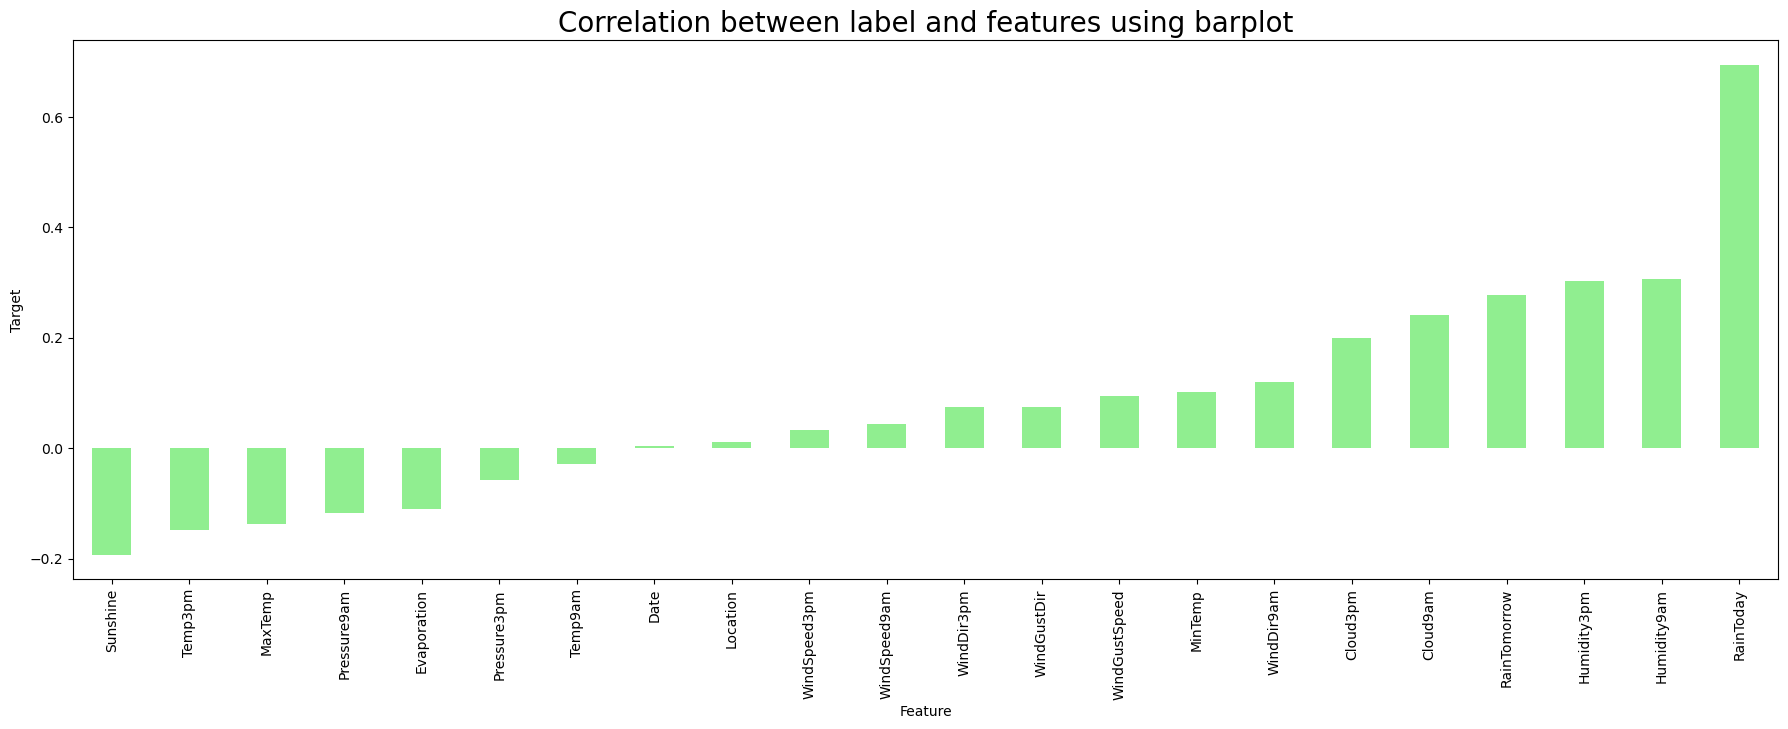

In [463]:
plt.figure(figsize=(22,7))
df2.corr()['Rainfall'].sort_values(ascending=True).drop(['Rainfall']).plot(kind='bar',color='lightgreen')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

# seperating features and label

In [517]:
x=df2.drop("Rainfall",axis=1)
y=df2["Rainfall"]

# Feature Scaling using Standard Scalarization

In [518]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.617978,-1.391396,0.069172,-0.190821,0.088552,-0.017794,1.222524,0.483303,1.317076,1.373685,...,0.199610,-1.559588,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675,-0.535916
1,-1.616711,-1.391396,-1.013829,0.174339,0.088552,-0.017794,1.413467,0.483303,-0.222676,1.596977,...,-1.395627,-1.394797,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675,-0.535916
2,-1.615443,-1.391396,-0.021078,0.273928,0.088552,-0.017794,1.604410,0.646634,1.317076,1.596977,...,-1.750124,-1.120144,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675,-0.535916
3,-1.614176,-1.391396,-0.688929,0.655685,0.088552,-0.017794,-0.495963,-1.149999,0.437218,-1.752399,...,-1.336544,-1.889171,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675,-0.535916
4,-1.612909,-1.391396,0.809223,1.369406,0.088552,-0.017794,1.222524,0.238308,-1.322499,-0.189357,...,0.849521,-0.955352,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675,-0.535916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,2.182240,1.203340,-1.844130,-0.107830,0.088552,-0.017794,-1.259735,-0.578343,0.437218,-1.529108,...,-0.982047,-1.449727,1.194978,0.892021,0.014663,0.017600,-1.358458,-0.047376,-0.535675,-0.535916
6405,2.183507,1.203340,-1.699730,0.207535,0.088552,-0.017794,-0.114077,-1.313329,0.437218,-1.082524,...,-0.686633,-1.614519,1.002652,0.680297,0.014663,0.017600,-1.217780,0.310505,-0.535675,-0.535916
6406,2.184775,1.203340,-1.374830,0.473105,0.088552,-0.017794,-0.686906,-0.088352,0.437218,1.373685,...,-0.863881,-1.449727,0.565550,0.274493,0.014663,0.017600,-0.936423,0.583177,-0.535675,-0.535916
6407,2.186042,1.203340,-0.941629,0.489704,0.088552,-0.017794,0.458752,-0.823338,0.657182,-1.082524,...,-0.982047,-1.449727,0.285805,0.221562,-0.525762,-0.982885,-0.479217,0.566135,-0.535675,-0.535916


# Checking variance inflation factor

In [519]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.533384,Date
1,1.617904,Location
2,9.020401,MinTemp
3,26.318100,MaxTemp
4,1.623150,Evaporation
5,2.024835,Sunshine
6,1.581296,WindGustDir
7,2.319697,WindGustSpeed
8,1.335610,WindDir9am
9,1.418829,WindDir3pm


In [520]:
# Dropping column
#x.drop(['Sunshine','Evaporation','Temp3pm','Temp9am','Pressure9am','WindGustSpeed','Pressure3pm','Date','Humidity9am','Humidity3pm','MaxTemp','MinTemp'],axis=1,inplace=True)

In [521]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.533384,Date
1,1.617904,Location
2,9.020401,MinTemp
3,26.318100,MaxTemp
4,1.623150,Evaporation
5,2.024835,Sunshine
6,1.581296,WindGustDir
7,2.319697,WindGustSpeed
8,1.335610,WindDir9am
9,1.418829,WindDir3pm


there is no multicollinearity

# Modelling

In [522]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# finding the best random state

In [523]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS)   

 Maximum r2 score is 0.5190157673165925 on random_state 85


# creating train test split

In [524]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [526]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.5190157673165925
R2_score on training Data: 48.5728677979252
Mean absolute error: 1.5709584286788696
Mean squared error: 11.108119351460537
Root Mean absolute error: 3.3328845391733175


In [527]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rfr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("Mean squared error:",mean_squared_error(y_test,pred_rfr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.5517035846234752
R2_score on training Data: 92.69116057700698
Mean absolute error: 1.313593354096483
Mean squared error: 10.353208584515315
Root Mean absolute error: 3.2176402198684855


In [528]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.4440278786266266
R2_score on training Data: 60.59107333636883
Mean absolute error: 1.4611696165914276
Mean squared error: 12.839931666461014
Root Mean absolute error: 3.5832850384055432


In [529]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_gbr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_gbr))
print("Mean squared error:",mean_squared_error(y_test,pred_gbr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 score: 0.5442063655134228
R2_score on training Data: 65.77300342180952
Mean absolute error: 1.3367105976342415
Mean squared error: 10.526353563122816
Root Mean absolute error: 3.2444342439203195


In [530]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.07313777891608841
R2_score on training Data: 100.0
Mean absolute error: 1.738247176626196
Mean squared error: 21.405475428415357
Root Mean absolute error: 4.626605173171292


In [531]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred_Lasso=Lasso.predict(x_test)
pred_train=Lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_Lasso))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_Lasso))
print("Mean squared error:",mean_squared_error(y_test,pred_Lasso))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_Lasso)))

R2 score: 0.4498789245444116
R2_score on training Data: 42.73448750430339
Mean absolute error: 1.7039839776810057
Mean squared error: 12.704804333860046
Root Mean absolute error: 3.5643799367996736


In [532]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print("Mean squared error:",mean_squared_error(y_test,pred_rd))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.5190012243690489
R2_score on training Data: 48.5728582588712
Mean absolute error: 1.5708338702567424
Mean squared error: 11.108455214439113
Root Mean absolute error: 3.332934925023156


In [533]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared error:",mean_squared_error(y_test,pred_svr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: 0.417479121374154
R2_score on training Data: 43.68698936472054
Mean absolute error: 1.3149602761442352
Mean squared error: 13.45306354096787
Root Mean absolute error: 3.667841809697887


In [534]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.5365420711190843
R2_score on training Data: 100.0
Mean absolute error: 1.351712046410601
Mean squared error: 10.703357071953178
Root Mean absolute error: 3.271598549937504


In [535]:
from sklearn.model_selection import cross_val_score

In [536]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_lr)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is 3.1250738842670325


In [537]:
score1=cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rfr)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is 6.393855614955307


In [538]:
score2=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is -4.3737149847295544


In [539]:
score3=cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_gbr)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is 5.644133703950066


In [540]:
score4=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is -41.46272495578337


In [541]:
score5=cross_val_score(Lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_Lasso)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is -3.7886103929510586


In [542]:
score6=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rd)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is 3.1236195895126775


In [543]:
score7=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_svr)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is -7.028590709976817


In [544]:
score8=cross_val_score(etr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_etr)-score.mean())*100)

[0.50065709 0.47979259 0.46357173 0.46070582 0.53409792]
0.48776502847392217
Difference between R2 score and cross validation score is 4.8777042645162085


LinearRegression is giving positive and less difference so it is our best model

In [545]:
final_model=LinearRegression()
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.5026161240568248
Mean absolute error: 3.454454408408061
Mean squared error: 34.70225864230922
Root Mean absolute error: 5.890862300402991


# saving the model

In [546]:
import pickle
file="amount of rainfall.pkl"
pickle.dump(final_model,open(file,'wb'))

# predicting by using the saved model

In [547]:
model=pickle.load(open('amount of rainfall.pkl','rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

51.90157673165925


# check how my model is behaving

In [548]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922
Predicted,0.193958,1.297203,7.852178,0.155588,1.268955,0.450779,7.182853,7.714305,0.106449,-0.539135,...,-0.264567,-0.323543,-0.260301,-0.764532,-0.079865,-0.059901,8.314381,0.264215,-0.403933,0.679126
Original,0.000000,0.000000,3.000000,0.000000,0.800000,0.000000,1.400000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,5.800000,0.000000,0.000000,0.000000
